In [1]:
%matplotlib notebook 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [198]:
#read healthcare csv file, print out the columns
health_data = "Python/CSV_files/voice_assistant_consumer_adoption_in_healthcare_report_data_2019.csv"
health_df = pd.read_csv(health_data, encoding="utf-8")
health_df.columns

Index(['device_car based assistant', 'device_smart watch', 'device_computer',
       'device_smart appliance', 'device_fitness device',
       'device_smart earpieces', 'device_uncommon smart device',
       'device_smart speaker', 'device_smartphone', 'device_smart tv',
       'Like to use in healthcare', 'auto_embedded', 'auto_bluetooth',
       'auto_CarPlay', 'auto_android auto', 'auto_other',
       'Have Employed VA in health', 'Shown Interest in Employing VA',
       'use_illness symptons', 'use_medication information',
       'use_locate services', 'use_treatment options', 'use_nutrition info',
       'use_locate healthcare professional', 'use_shop for medication',
       'use_schedule appointments', 'use_provide care',
       'use_healthcare device', 'use_health insurance',
       'use_health or wellness coaching', 'use_other ',
       'Usage Based on Income', 'Gender Usage', 'Age Usage',
       'Privacy Sentiment_Jan', 'Privacy Sentiment_Sept'],
      dtype='object')

In [201]:
#read consumer_report csv file, print out columns
consumer_data = "../../Desktop/UCI_Project_1/Resources/smart_speaker_consumer_adoption_report_2019.csv"
consumer_df = pd.read_csv(consumer_data, encoding="utf-8")
consumer_df.columns

Index(['brand_2019', 'device', 'smart_display_2018', 'usage_2019',
       'usage_2018', 'number_devices_2019', 'number_devices_2018',
       'living_room', 'bedroom', 'kitchen', 'home_office', 'dining_room',
       'bathroom', 'garage', 'work_office', 'music', 'news', 'movies',
       'how_to_instructions', 'history', 'products', 'restaurants', 'sports',
       'retail_store_hours', 'science', 'math', 'games', 'health_and_wellness',
       'none_of_the_above', 'celebrities', 'politics', 'local_business',
       'travel', 'other', 'professional_work_related',
       'finance_banking_investing', 'fashion'],
      dtype='object')

In [233]:
#isolate the usage labels 
consumer_use_df = consumer_df[['music', 'news', 'movies',
       'how_to_instructions', 'history', 'products', 'restaurants', 'sports',
       'retail_store_hours', 'science', 'math', 'games', 'health_and_wellness',
       'celebrities', 'politics', 'local_business',
       'travel', 'professional_work_related',
       'finance_banking_investing', 'fashion', 'other']]
consumer_use_df.head()

,music,news,movies,how_to_instructions,history,products,restaurants,sports,retail_store_hours,science,...,games,health_and_wellness,celebrities,politics,local_business,travel,professional_work_related,finance_banking_investing,fashion,other
0,yes,yes,yes,yes,no,no,no,yes,yes,no,...,no,no,no,no,yes,no,no,no,no,no
1,yes,yes,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,yes,no,no
2,yes,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no,no,yes,no,no,no
3,no,no,no,yes,no,no,yes,no,no,no,...,no,no,no,no,no,no,yes,no,no,no
4,yes,yes,no,no,yes,no,no,no,yes,no,...,no,no,no,no,no,no,no,no,no,no


In [236]:
#find number of yes and no in each column via value_counts()
consumer_usage_counts_df = consumer_use_df.apply(pd.Series.value_counts)
consumer_usage_counts_df

,music,news,movies,how_to_instructions,history,products,restaurants,sports,retail_store_hours,science,...,games,health_and_wellness,celebrities,politics,local_business,travel,professional_work_related,finance_banking_investing,fashion,other
no,468,668,679,743,770,781,797,800,803,818,...,865,872,875,920,933,953,984,993,1008,966
yes,570,370,359,295,268,257,241,238,235,220,...,173,166,163,118,105,85,54,45,30,72


<IPython.core.display.Javascript object>


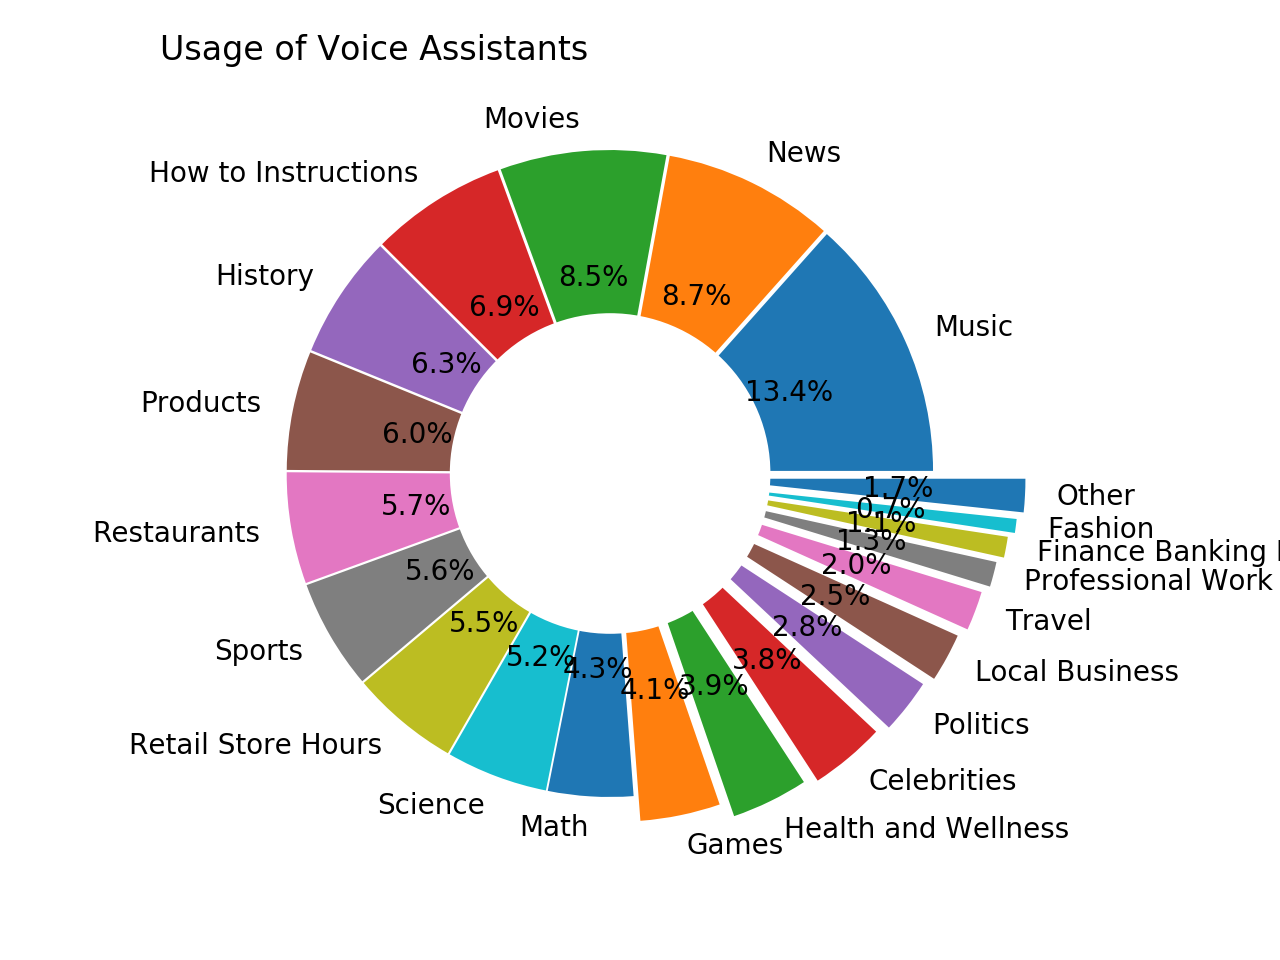

In [244]:
#define labels
consumer_labels = ['Music', 'News', 'Movies',
       'How to Instructions', 'History', 'Products', 'Restaurants', 'Sports',
       'Retail Store Hours', 'Science', 'Math', 'Games', 'Health and Wellness',
       'Celebrities', 'Politics', 'Local Business',
       'Travel', 'Professional Work Related',
       'Finance Banking Investing', 'Fashion', 'Other']
#define values 
count = consumer_usage_counts_df.iloc[1, :]
#define explosion of the wedges- to distinguish the wedges
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 
            0.10, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31)
#plot the pie
fig2, ax = plt.subplots()
plt.pie(count, labels = consumer_labels, autopct='%1.1f%%', explode=explode)


#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title('Usage of Voice Assistants', pad=20.0, loc='left')
plt.show()

In [204]:
#isolate the device types from the health dataframe
device_types_df = health_df[['device_smart appliance', 'device_fitness device',
       'device_smart earpieces', 'device_uncommon smart device',
       'device_smart speaker', 'device_smartphone', 'device_smart tv']]
device_types_df.head()

,device_smart appliance,device_fitness device,device_smart earpieces,device_uncommon smart device,device_smart speaker,device_smartphone,device_smart tv
0,no,no,no,no,no,no,no
1,no,no,no,no,no,no,no
2,no,no,no,no,no,yes,no
3,no,no,no,no,no,yes,no
4,no,yes,no,yes,yes,yes,yes


In [245]:
#count how many yes and no values there are
device_counts_df = device_types_df.apply(pd.Series.value_counts)
device_counts_df

,device_smart appliance,device_fitness device,device_smart earpieces,device_uncommon smart device,device_smart speaker,device_smartphone,device_smart tv
no,983,875,939,933,827,476,929
yes,21,129,65,71,177,528,75


<IPython.core.display.Javascript object>


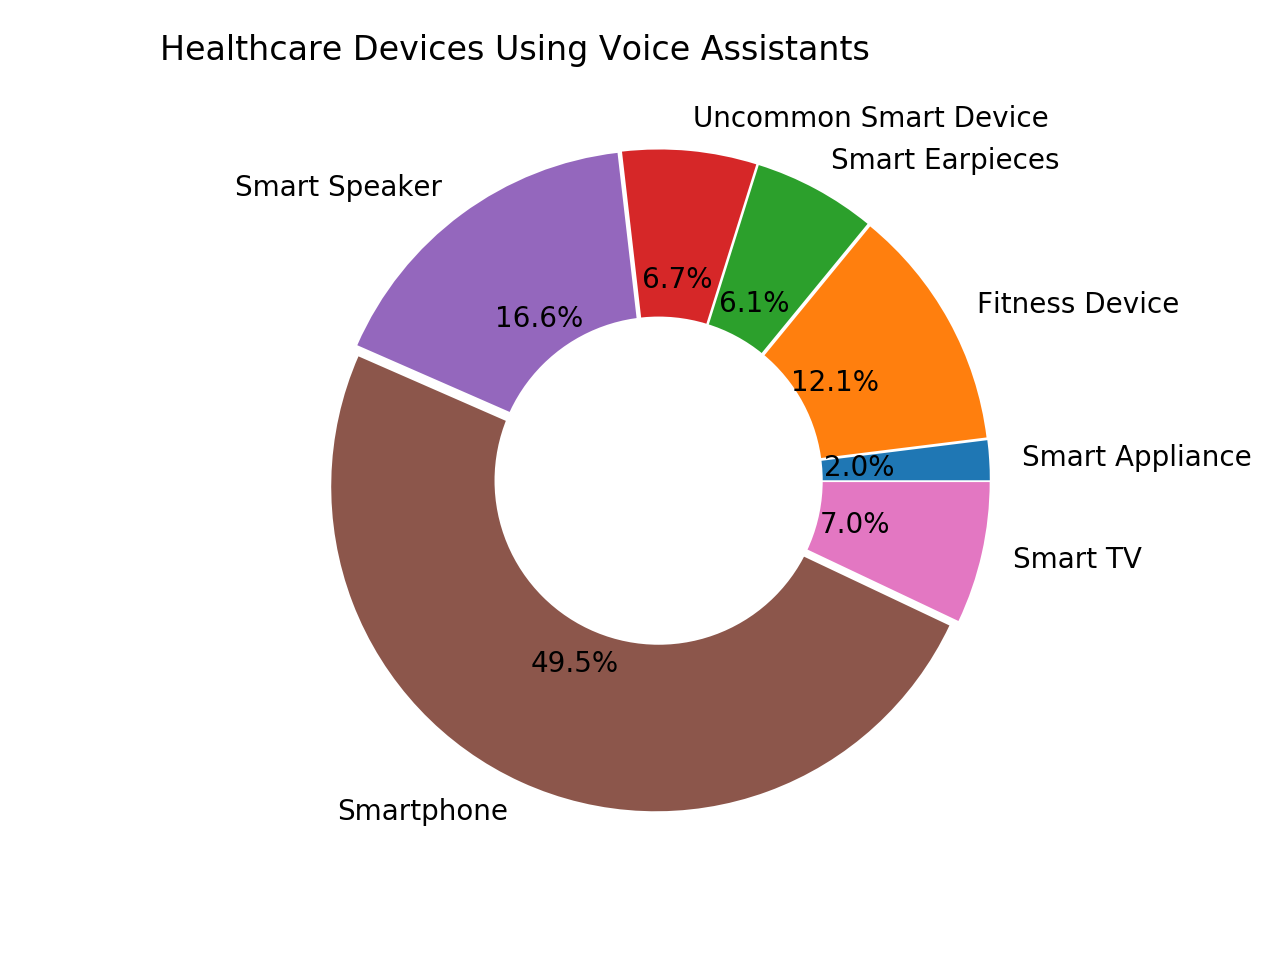

In [230]:
#define labels
labels = ['Smart Appliance', 'Fitness Device', 'Smart Earpieces', 'Uncommon Smart Device', 'Smart Speaker', 'Smartphone', 'Smart TV']
#define values
count = device_counts_df.iloc[1, :]
#explode wedges of pie
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

#plot the pie
fig2, ax = plt.subplots()
plt.pie(count, labels = labels, autopct='%1.1f%%', explode=explode)

#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title('Healthcare Devices Using Voice Assistants', pad=20.0, loc='left')
plt.show()

In [214]:
#isolate the auto uses of from health dataframe
auto_df = health_df[['auto_embedded', 'auto_bluetooth',
       'auto_CarPlay', 'auto_android auto', 'auto_other']]
auto_df.head()

,auto_embedded,auto_bluetooth,auto_CarPlay,auto_android auto,auto_other
0,no,no,no,no,no
1,no,no,no,no,no
2,no,no,no,no,no
3,no,no,no,no,no
4,yes,yes,yes,no,no


In [215]:
#count number of yes and no in the auto dataframe
auto_count_df = auto_df.apply(pd.Series.value_counts)
auto_count_df

,auto_embedded,auto_bluetooth,auto_CarPlay,auto_android auto,auto_other
no,778,790,846,944,972
yes,226,214,158,60,32


<IPython.core.display.Javascript object>


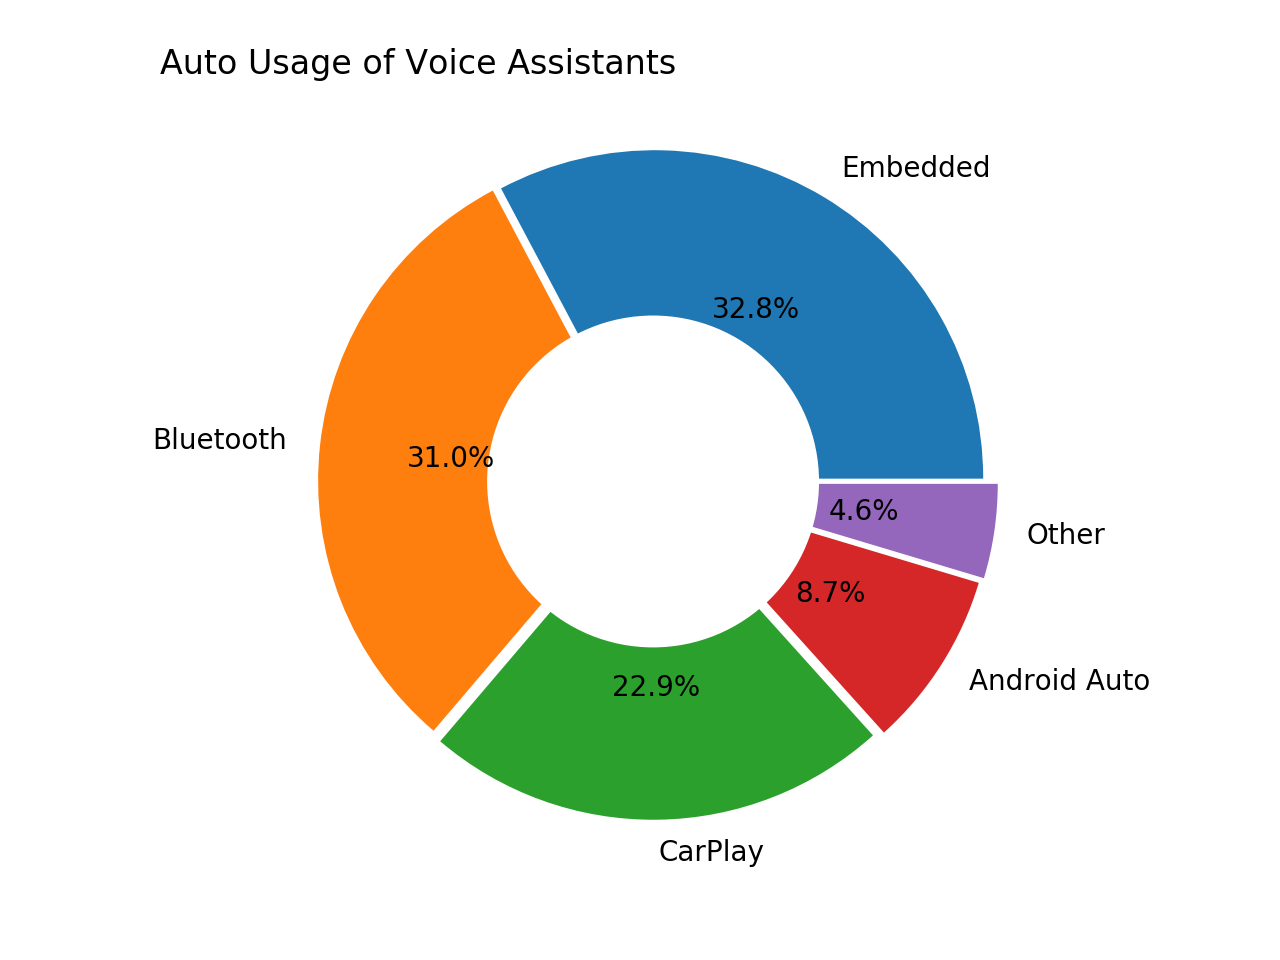

In [232]:
#define labels
auto_labels = ['Embedded', 'Bluetooth', 'CarPlay', 'Android Auto', 'Other']
#define values
count = auto_count_df.iloc[1, :]
#explode the wedges of the pie
explode = (0.01, 0.02, 0.03, 0.04, 0.05)

#plot the pie
fig, ax = plt.subplots()
plt.pie(count, labels = auto_labels, autopct='%1.1f%%', explode=explode)


#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title('Auto Usage of Voice Assistants', pad= 15, loc = 'left')
plt.show()

In [52]:
health_df.columns

Index(['device_car based assistant', 'device_smart watch', 'device_computer',
       'device_smart appliance', 'device_fitness device',
       'device_smart earpieces', 'device_uncommon smart device',
       'device_smart speaker', 'device_smartphone', 'device_smart tv',
       'Like to use in healthcare', 'auto_embedded', 'auto_bluetooth',
       'auto_CarPlay', 'auto_android auto', 'auto_other',
       'Have Employed VA in health', 'Shown Interest in Employing VA',
       'use_illness symptons', 'use_medication information',
       'use_locate services', 'use_treatment options', 'use_nutrition info',
       'use_locate healthcare professional', 'use_shop for medication',
       'use_schedule appointments', 'use_provide care',
       'use_healthcare device', 'use_health insurance',
       'use_health or wellness coaching', 'use_other ',
       'Usage Based on Income', 'Gender Usage', 'Age Usage',
       'Privacy Sentiment_Jan', 'Privacy Sentiment_Sept'],
      dtype='object')

In [17]:
uses_df = health_df[['use_illness symptons', 'use_medication information',
       'use_locate services', 'use_treatment options', 'use_nutrition info',
       'use_locate healthcare professional', 'use_shop for medication',
       'use_schedule appointments', 'use_provide care',
       'use_healthcare device', 'use_health insurance',
       'use_health or wellness coaching', 'use_other ']]
uses_df

,use_illness symptons,use_medication information,use_locate services,use_treatment options,use_nutrition info,use_locate healthcare professional,use_shop for medication,use_schedule appointments,use_provide care,use_healthcare device,use_health insurance,use_health or wellness coaching,use_other
0,yes,no,no,no,no,no,no,no,no,no,no,no,no
1,no,no,no,no,no,no,no,no,no,no,no,no,no
2,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no
3,yes,yes,no,no,no,no,no,no,no,no,no,no,no
4,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,no
1000,no,no,no,no,no,no,no,no,no,no,no,no,no
1001,yes,no,no,no,no,no,no,no,no,no,no,no,no
1002,yes,no,no,no,no,no,no,no,no,no,no,no,no


In [28]:
use_counts_df = uses_df.apply(pd.Series.value_counts)
use_counts_df

,use_illness symptons,use_medication information,use_locate services,use_treatment options,use_nutrition info,use_locate healthcare professional,use_shop for medication,use_schedule appointments,use_provide care,use_healthcare device,use_health insurance,use_health or wellness coaching,use_other
no,272,543,625,625,709,721,838,850,850,862,885,934,957
yes,732,461,379,379,295,283,166,154,154,142,119,70,47


<IPython.core.display.Javascript object>


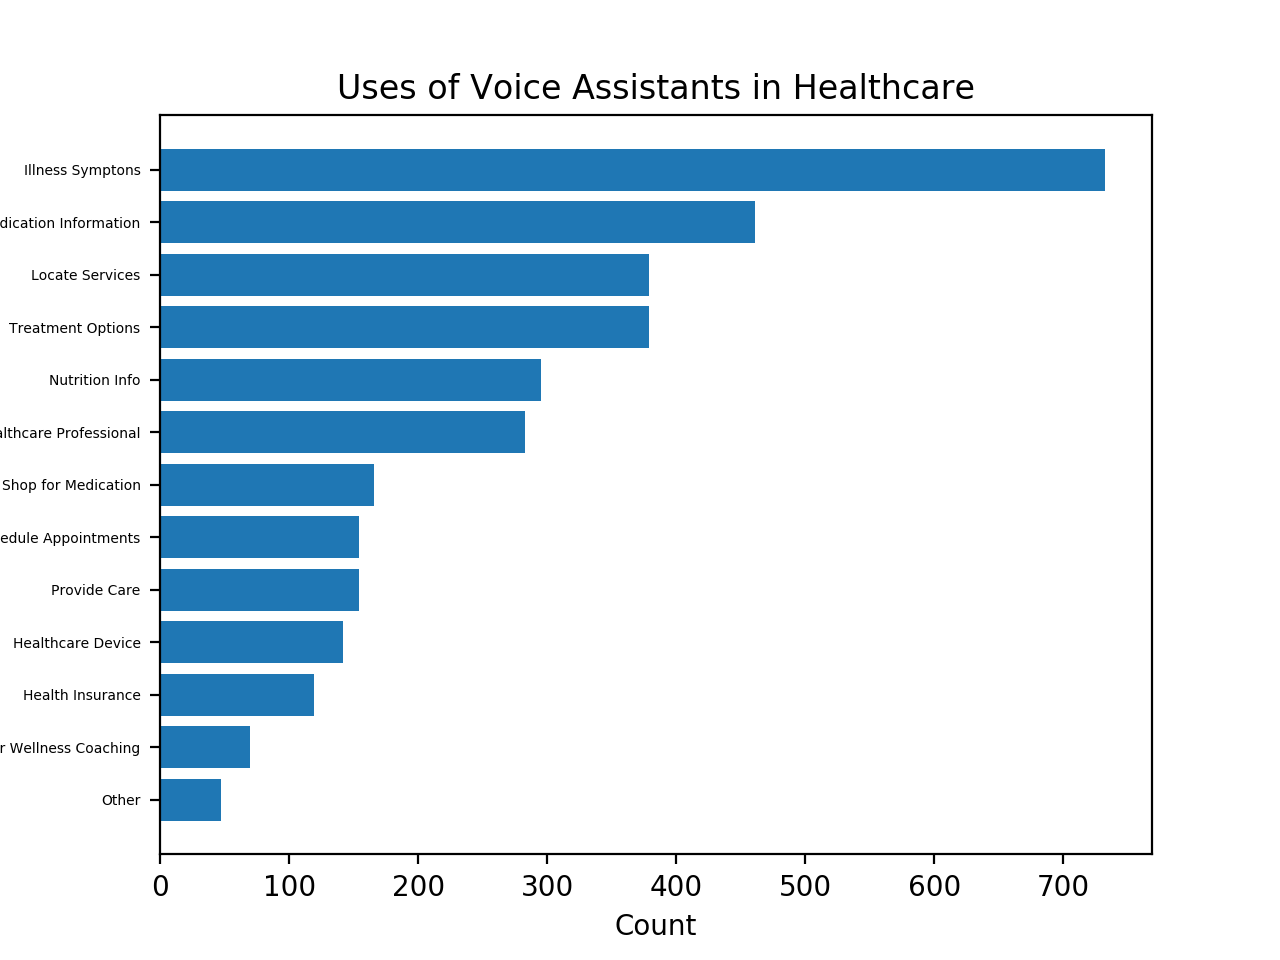

In [225]:
fig, ax = plt.subplots()

health_labels = ['Illness Symptons', 'Medication Information',
       'Locate Services', 'Treatment Options', 'Nutrition Info',
       'Locate Healthcare Professional', 'Shop for Medication',
       'Schedule Appointments', 'Provide Care',
       'Healthcare Device', 'Health Insurance',
       'Health or Wellness Coaching', 'Other']
yes = use_counts_df.iloc[1, :]

y_values = np.arange(len(health_labels)) 

plt.barh(y_values, yes, align='center')
plt.yticks(y_values)
ax.set_yticklabels(health_labels, fontsize=5)
ax.invert_yaxis()

plt.xlabel('Count')
plt.ylabel('Uses')
plt.title('Uses of Voice Assistants in Healthcare')


plt.show()

<IPython.core.display.Javascript object>


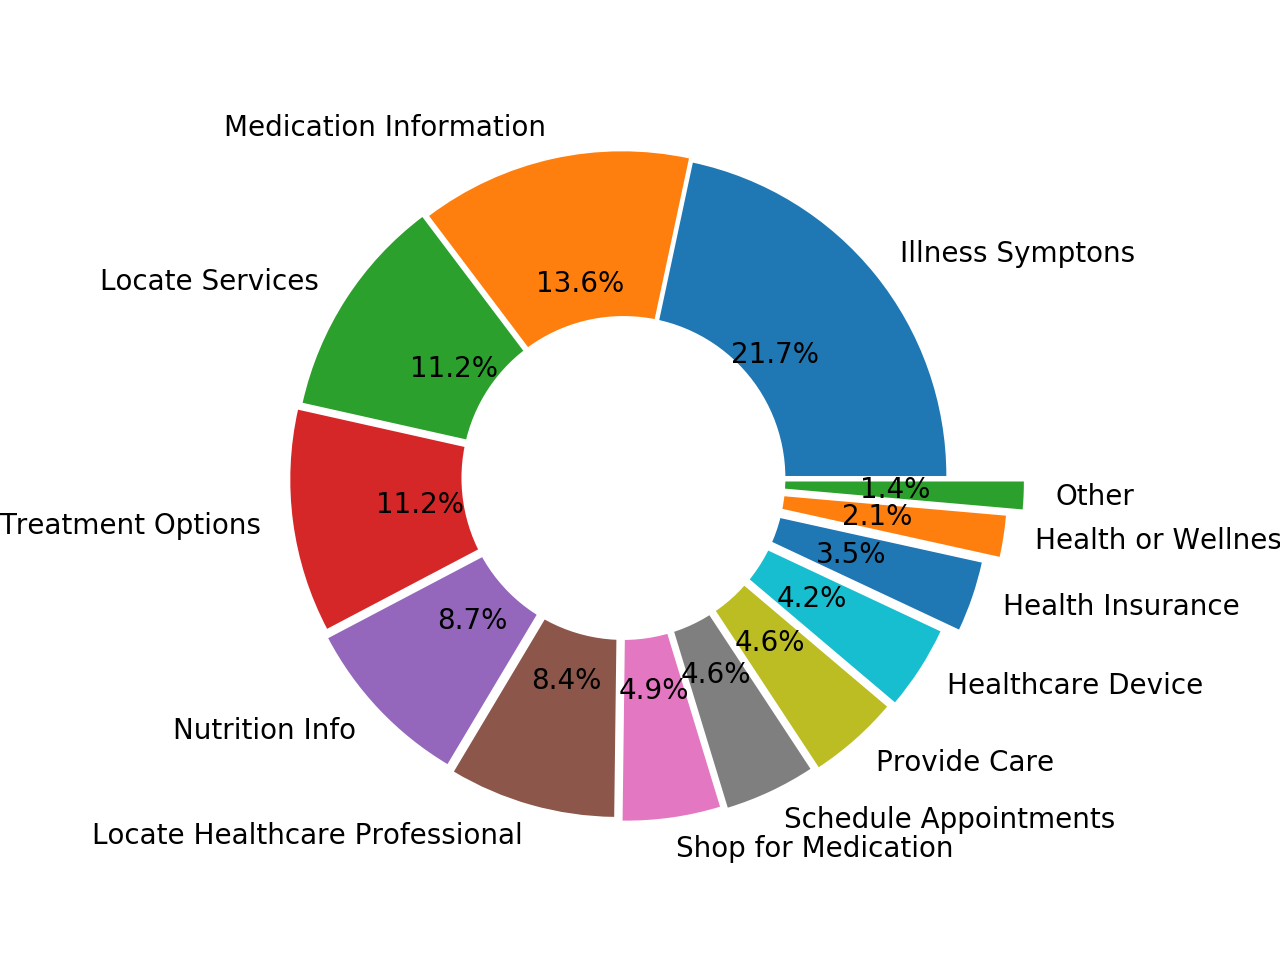

In [222]:
health_labels = ['Illness Symptons', 'Medication Information',
       'Locate Services', 'Treatment Options', 'Nutrition Info',
       'Locate Healthcare Professional', 'Shop for Medication',
       'Schedule Appointments', 'Provide Care',
       'Healthcare Device', 'Health Insurance',
       'Health or Wellness Coaching', 'Other']
count = use_counts_df.iloc[1, :]
explode = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.20, 0.25)

fig1, ax1 = plt.subplots()
plt.pie(count, labels = health_labels, autopct='%1.1f%%', explode=explode)


#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.show()

In [203]:
#read age data from csv file
age_data = "Python/CSV_files/voice_assistants_interest_by_age.csv"
age_df = pd.read_csv(age_data, encoding="utf-8")
age_df.head()

,18 - 29,30 - 45,45 - 60,61+
0,interested,interested,interested,interested
1,not interested,not interested,not interested,not interested
2,interested,interested,interested,interested
3,interested,interested,interested,interested
4,interested,interested,interested,interested


In [103]:
#count unique values for each column
age_df.apply(pd.Series.value_counts)

,18 - 29,30 - 45,45 - 60,61+
have used,91.0,NaN,NaN,NaN
have used,NaN,80.0,70.0,60.0
interested,530.0,508.0,547.0,462.0
not interested,383.0,416.0,387.0,NaN
not interested,NaN,NaN,NaN,482.0


In [128]:
#use combine_first function to merge first two rows to remove NaN values
df1 = pd.DataFrame({"18 - 29 ": [91.0, 530.0, 383.0, None],
                   "30 - 45": [None,  508.0, 416.0, None],
                   "45 - 60": [None, 547.0, 387.0, None],
                   "61+": [None, 462.0, None, 482.0]})
df2 = pd.DataFrame({"18 - 29 ": [None, 530.0, 383.0, None],
                   "30 - 45": [80.0,  508.0, 416.0, None],
                   "45 - 60": [70.0, 547.0, 387.0, None],
                   "61+": [60.0, 462.0, None, 482.0]})
df1.combine_first(df2)


,18 - 29,30 - 45,45 - 60,61+
0,91.0,80.0,70.0,60.0
1,530.0,508.0,547.0,462.0
2,383.0,416.0,387.0,NaN
3,NaN,NaN,NaN,482.0


In [133]:
#use combine_first function to merge last two rows to remove NaN values
df1 = pd.DataFrame({"18 - 29 ": [91.0, 530.0, 383.0],
                   "30 - 45": [80.0,  508.0, 416.0],
                   "45 - 60": [70.0, 547.0, 387.0],
                   "61+": [60.0, 462.0, None]}, index = ['have used', 'interested', 'not interested'])
df2 = pd.DataFrame({"18 - 29 ": [91.0, 530.0, None],
                   "30 - 45": [80.0,  508.0, None],
                   "45 - 60": [70.0, 547.0, None],
                   "61+": [60.0, 462.0, 482.0]}, index = ['have used', 'interested', 'not interested'])
counts_df = df1.combine_first(df2)
counts_df

,18 - 29,30 - 45,45 - 60,61+
have used,91.0,80.0,70.0,60.0
interested,530.0,508.0,547.0,462.0
not interested,383.0,416.0,387.0,482.0


<IPython.core.display.Javascript object>


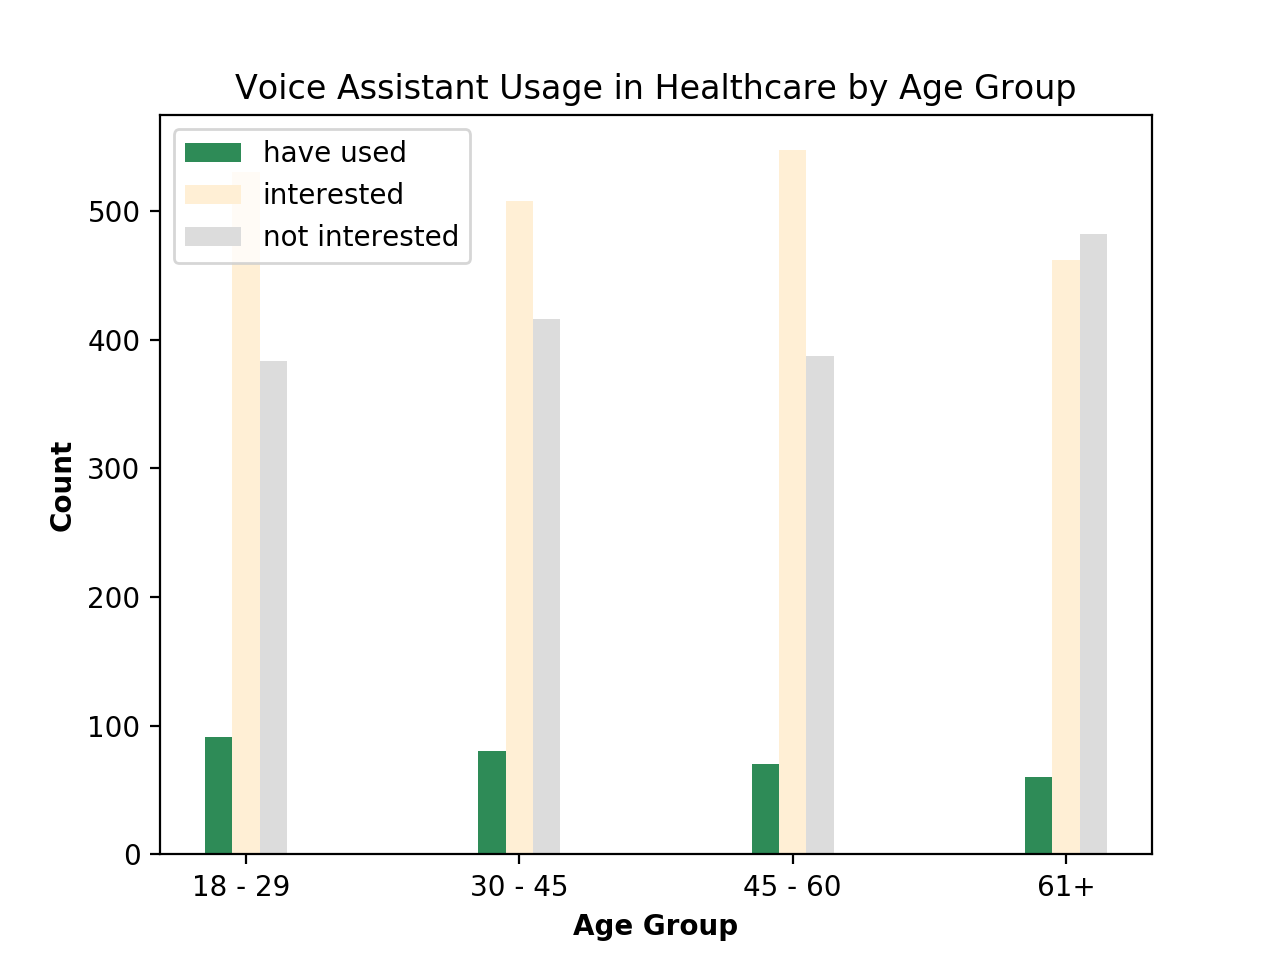

In [197]:
#set the x-axis labels as the columns  of age_df
x_values = counts_df.columns
bar_width = 0.1

#define values for each of the three bars
bars1 = counts_df.iloc[0, :]
bars2 = counts_df.iloc[1, :]
bars3 = counts_df.iloc[2, :]

#define positions for each bar
pos1 = np.arange(len(bars1))
pos2 = [x + bar_width for x in pos1]
pos3 = [x + bar_width for x in pos2]

#plot the grouped bar chart
fig, ax=plt.subplots()
plt.bar(pos1, bars1, width=bar_width, color="seagreen", label="have used")
plt.bar(pos2, bars2, width= bar_width, color= "papayawhip", label="interested")
plt.bar(pos3, bars3, width=bar_width, color="gainsboro", label="not interested")

#define labels
plt.xlabel('Age Group', fontweight='bold')
plt.xticks(pos2, labels= x_values)
plt.ylabel('Count', fontweight='bold')
plt.title('Voice Assistant Usage in Healthcare by Age Group')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


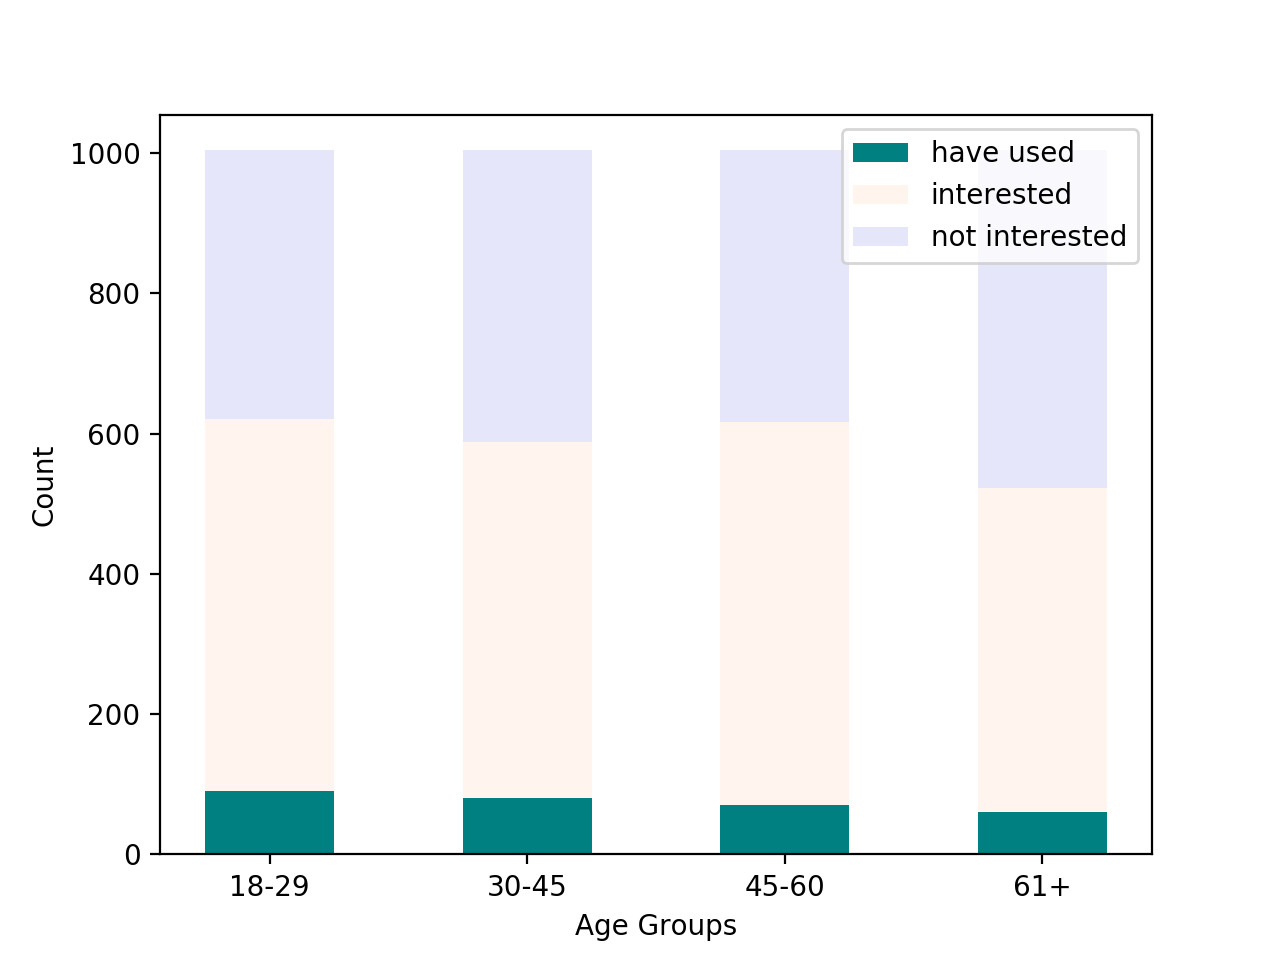

In [163]:
#define the values of the bars 
bars1 = counts_df.iloc[0, :]
bars2 = counts_df.iloc[1, :]
bars3 = counts_df.iloc[2, :]

bars = np.add(bars1, bars2).tolist()

r = [0, 1, 2, 3]

names = ["18-29", "30-45", "45-60", "61+"]
new_width = 0.5

f, ax1 = plt.subplots()
plt.bar(r, bars1, color="teal", width=new_width)
plt.bar(r, bars2, color="seashell", bottom=bars1, width=new_width)
plt.bar(r, bars3, color="lavender", bottom=bars, width=new_width)

plt.xticks(r, labels = names)
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Voice Assistant Usage in Healthcare by Age Group')

plt.legend(labels=["have used", "interested", "not interested"])
plt.show()